In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd


from scipy.stats import linregress
from sklearn.metrics import r2_score

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'Кальций (Ca)')

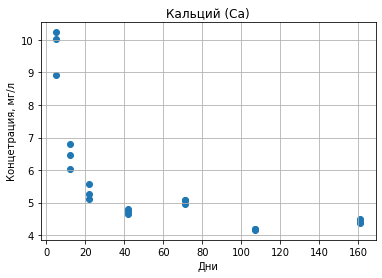

In [ ]:
df = pd.read_csv('../data/dataset.csv', index_col=0)
mask = (df['variable']=='Al') & (df['parameter']=='Oxalic')

t= df.loc[mask, 'days'].values
A= df.loc[mask, 'value'].values
plt.scatter(t,1/A)
plt.ylabel('Концетрация, мг/л')
plt.xlabel('Дни')
plt.grid()
plt.title('Кальций (Ca)')

In [ ]:
df.loc[mask].to_csv('/Users/mikhailgasanov/Desktop/Example_kinetics.csv')

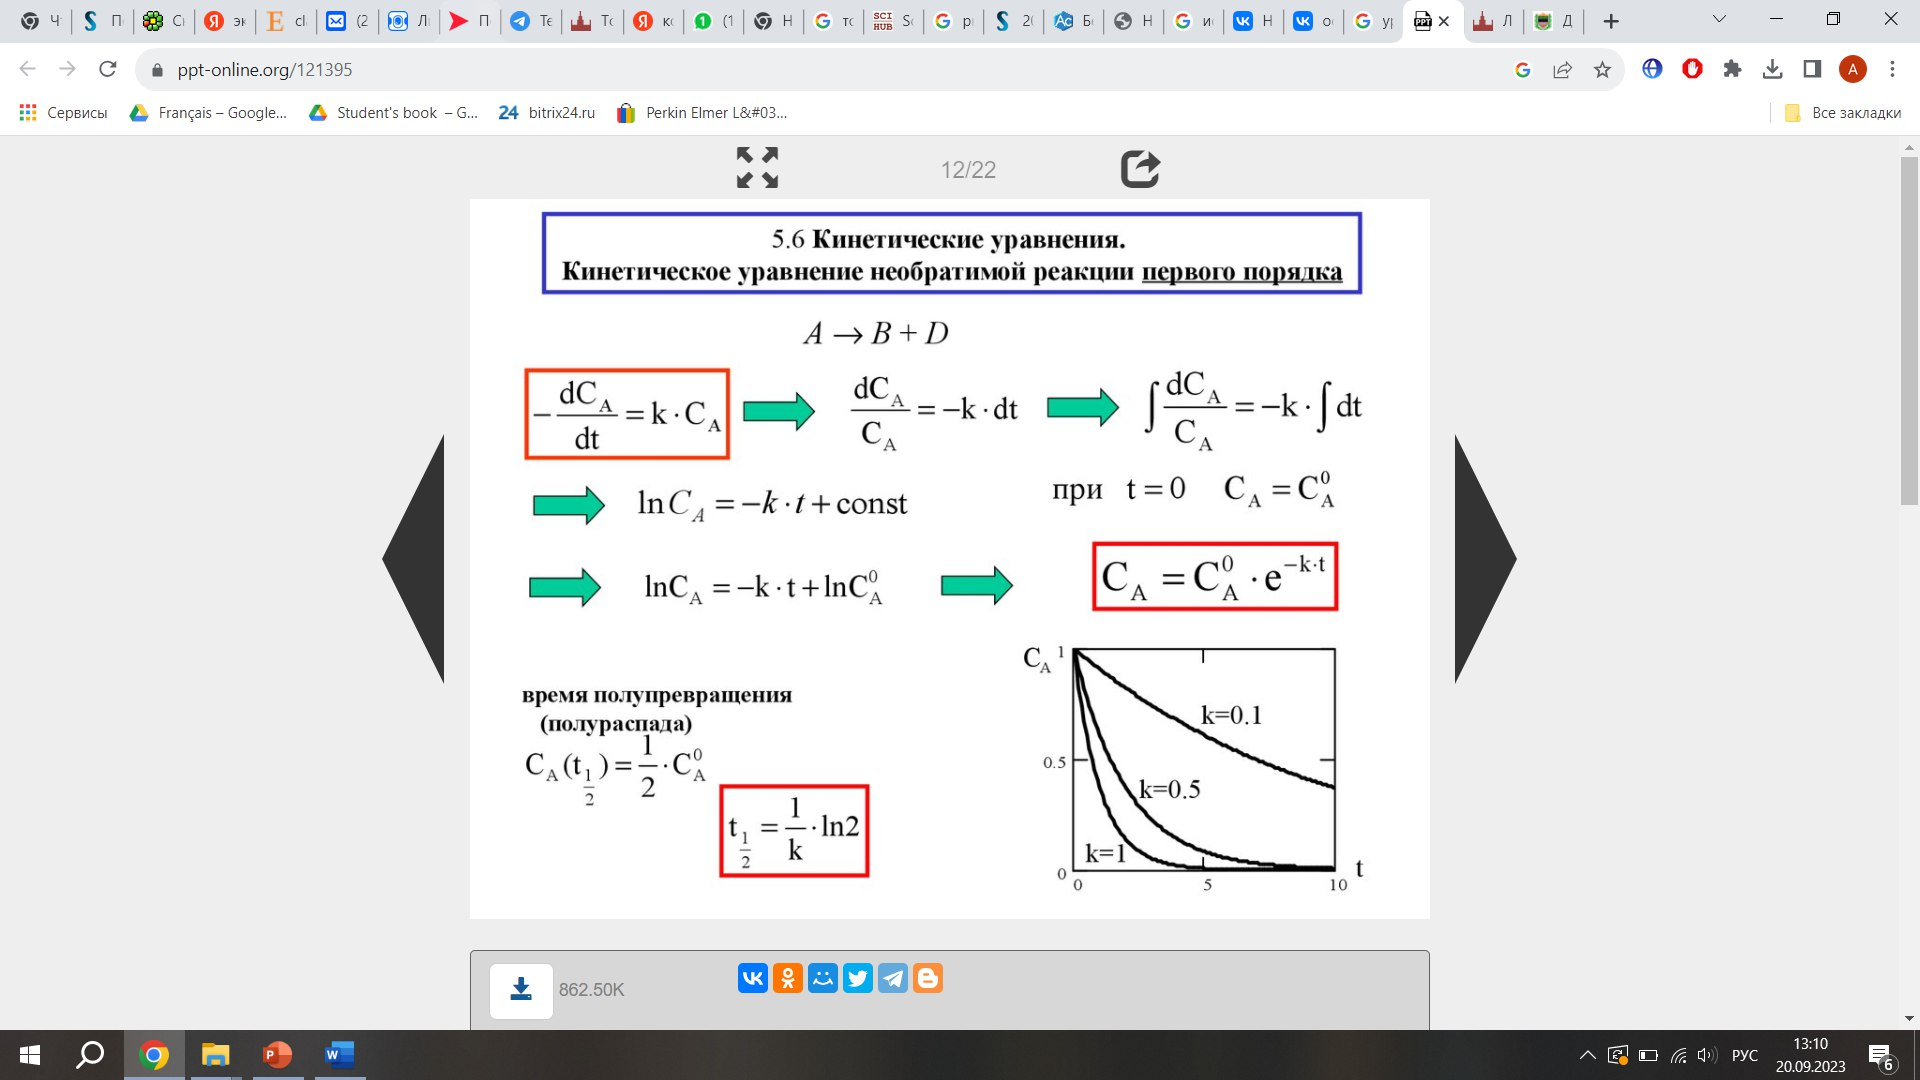

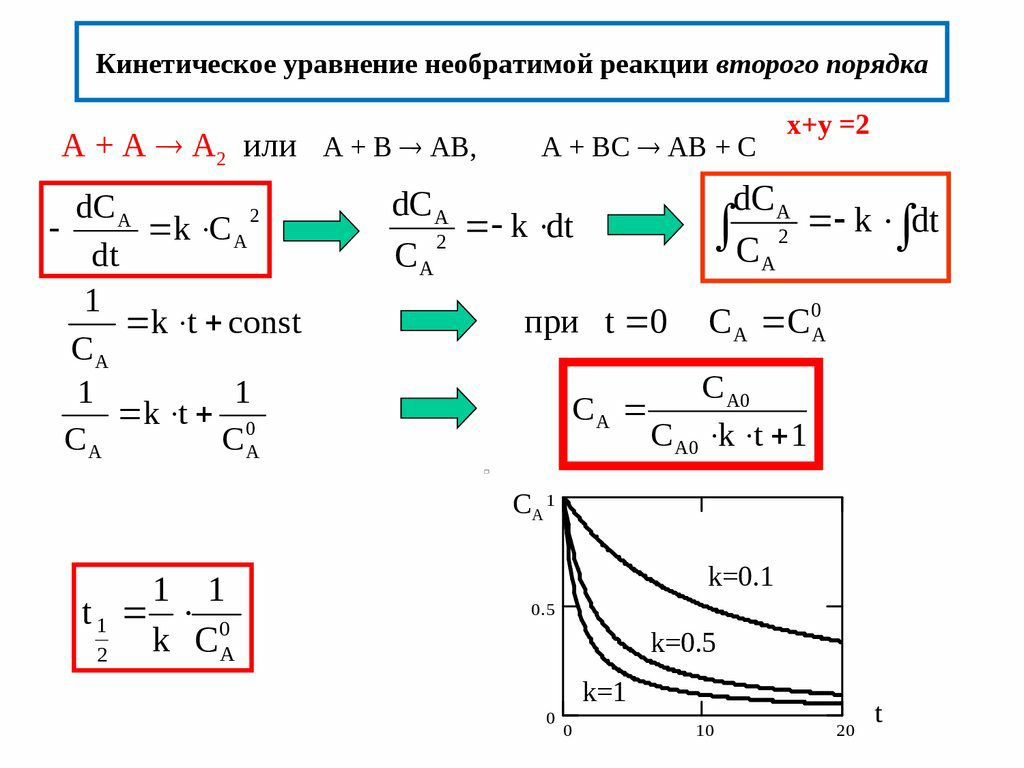

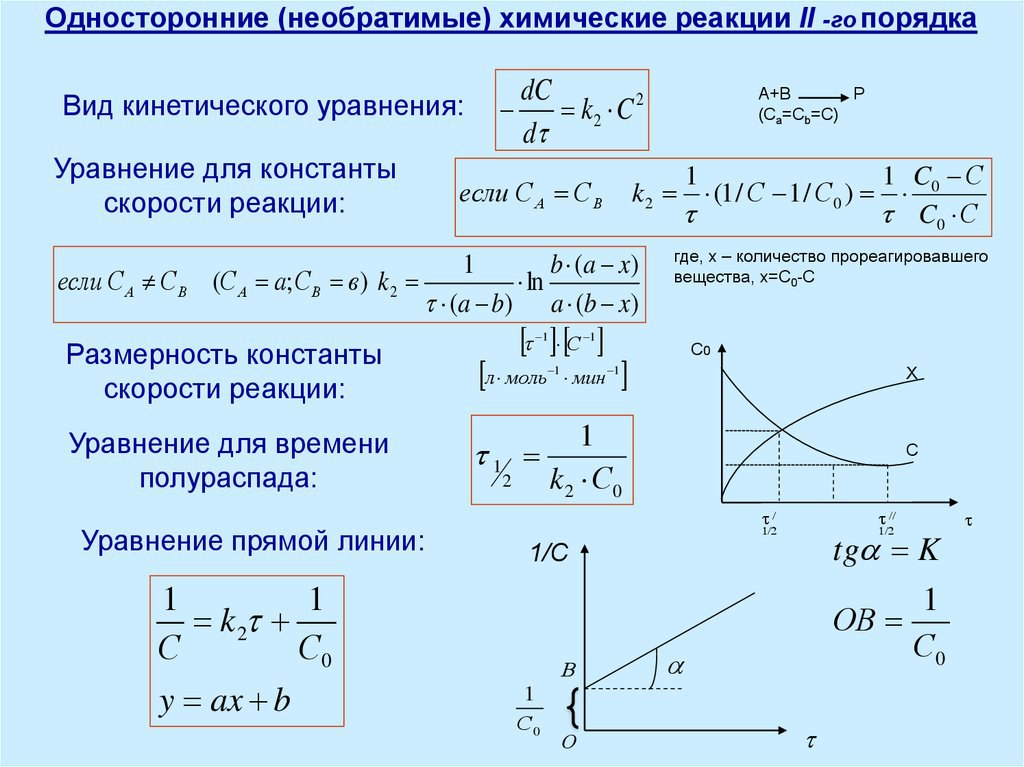

In [ ]:
def C_a(CA0, k, t):
    C_a = CA0 / (CA0*k*t+1)
    return C_a

In [ ]:
initC0 = element.loc[element['days']==start_timestep, 'value']

In [ ]:
initC0

108    0.04525
109    0.04250
110    0.04550
Name: value, dtype: float64

In [ ]:
# (1/element['value'])

# element['1/C']

# element['1/C0'] = element[]

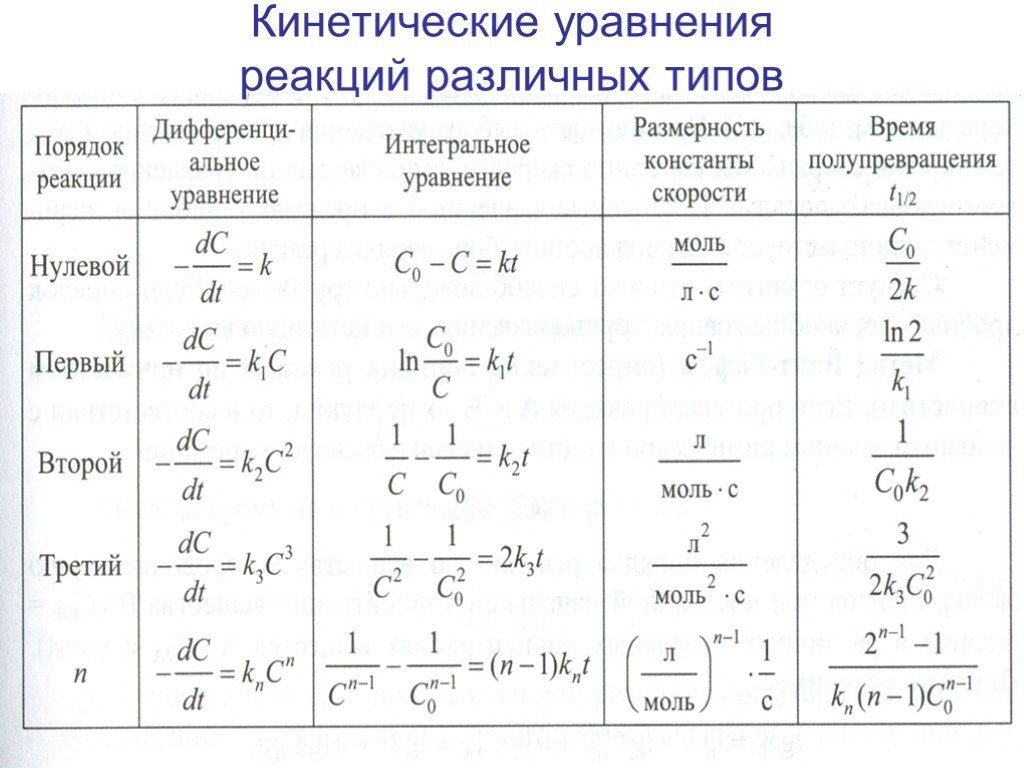

In [ ]:
# plt.style.use(['science', 'no-latex'])

In [ ]:
def get_plot(element:pd.DataFrame, acid: str, el: str):
    start_timestep  = element['days'].unique()[0]
    element['hours'] = element['days']*24
    element.loc[:, '1/C'] = np.nan
    element.loc[:, '1/C0'] = np.nan
    for day in element['days'].unique():
        initC0 = element.loc[element['days']==start_timestep, 'value']
        timestep = element.loc[element['days']==day, 'value']

    #     np.log(initC0.values / timestep.values)
        element.loc[element['days']==day, '1/C'] = timestep.values**-1 
        element.loc[element['days']==day, '1/C0'] = initC0.values**-1
    mask = (element['days']>6)&(element['days']<200)
    element.loc[:, 'hours'] = element.loc[:, 'days']*24
    t = element.loc[mask, 'hours'].values
    y = element.loc[mask, '1/C'].values

    slope, intercept, r, p, se = linregress(t, y)
    func = np.poly1d((slope, intercept))
    plt.scatter(t,y)
    plt.plot(t , func(t), label = f"{el} - {acid}")
    plt.title(f'$R^2$: {r**2:.2f},    $k$: {slope:.5f},    $b$: {intercept:.3f}')
    plt.legend()
    plt.grid()
    plt.savefig(f'../plots/second_kinetic_{el}_{acid}.png', dpi=300)
    plt.show()

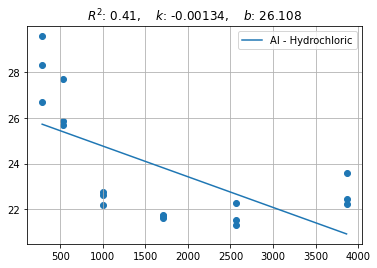

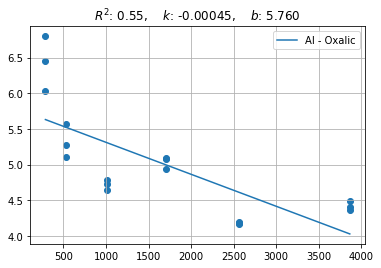

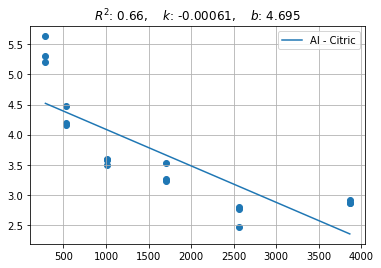

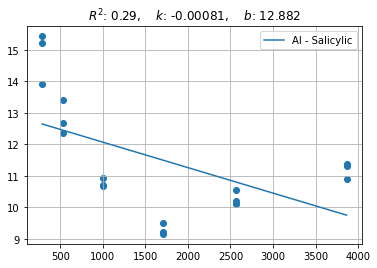

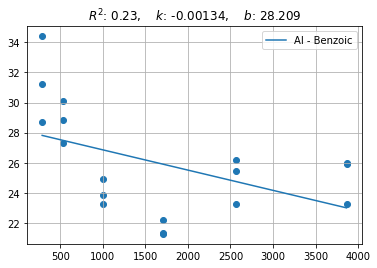

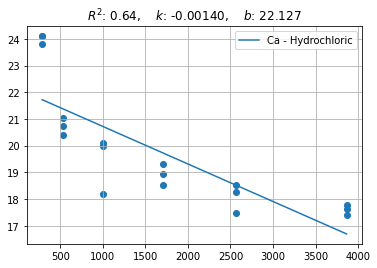

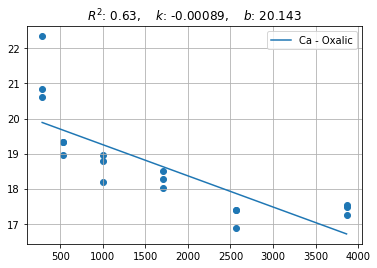

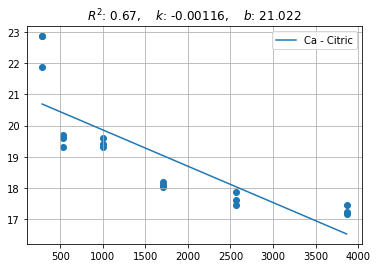

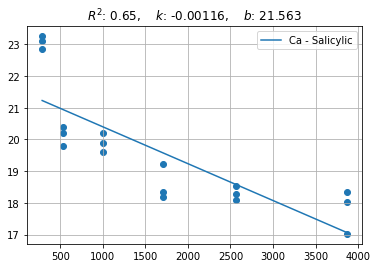

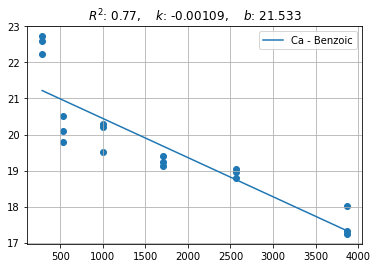

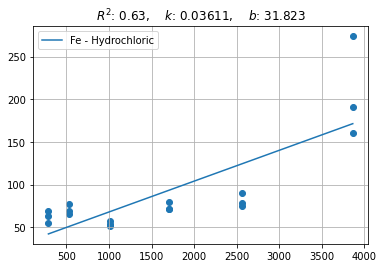

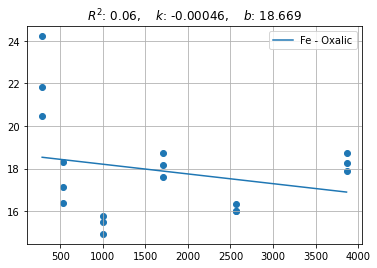

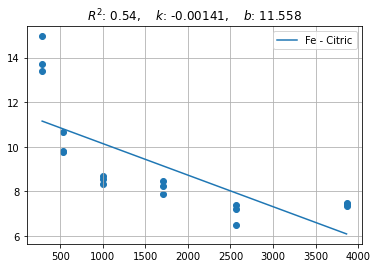

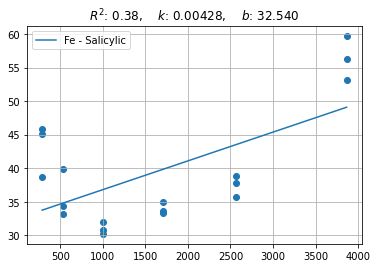

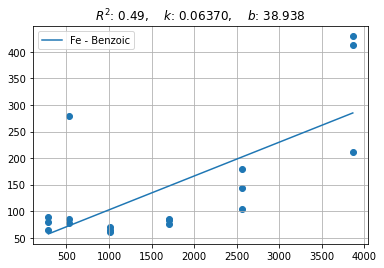

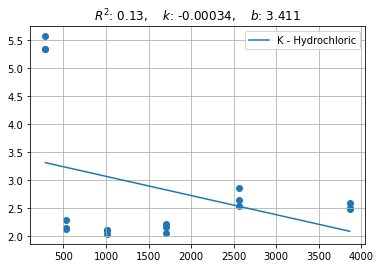

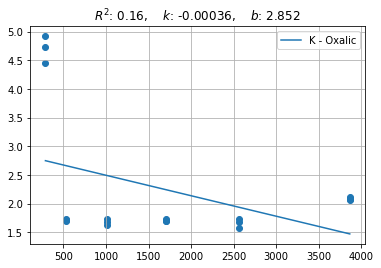

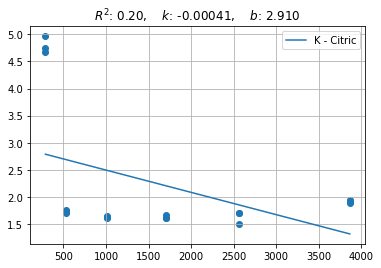

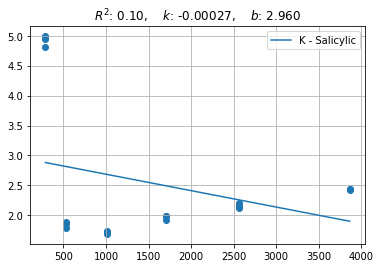

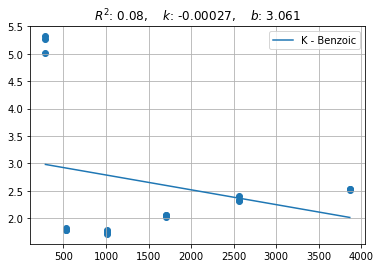

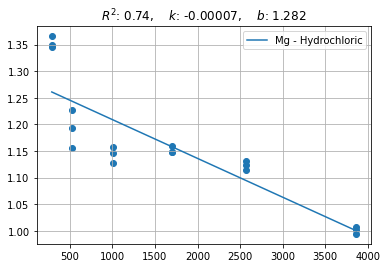

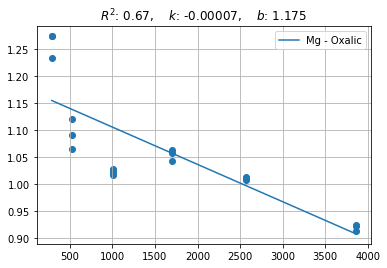

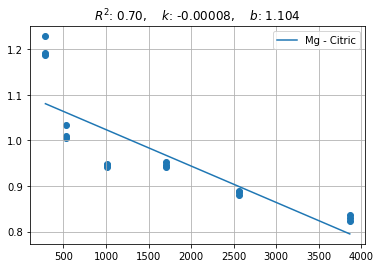

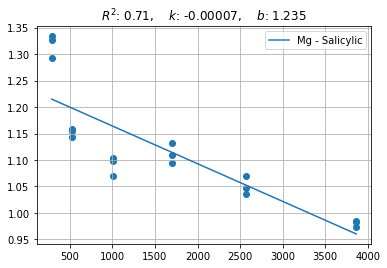

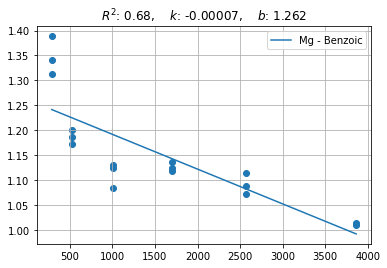

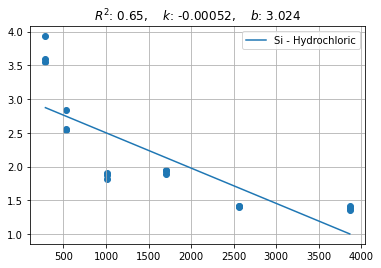

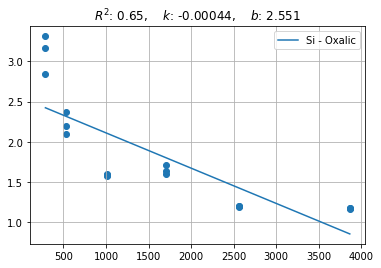

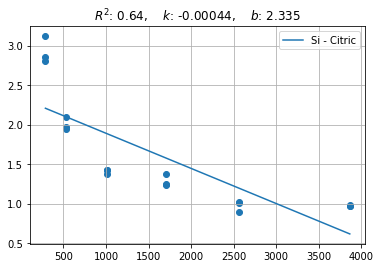

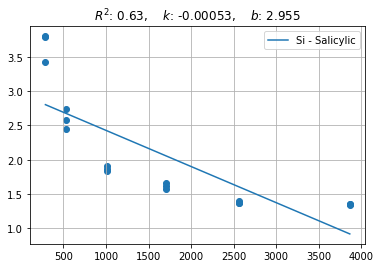

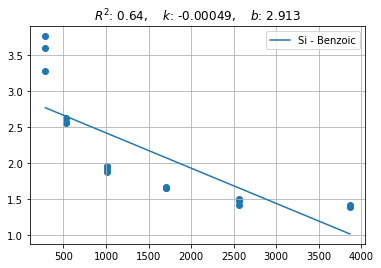

In [ ]:
df = pd.read_csv('../data/dataset.csv', index_col=0)
# df.loc[df['days']==5, 'days']=1
for element in df['variable'].unique():
    for acid in df['parameter'].unique():
        mask = (df['variable']==element) & (df['parameter']==acid)
        select = df.loc[mask]
        get_plot(element=select, acid=acid, el=element)

In [ ]:
df['days'].unique()

array([  5,  12,  22,  42,  71, 107, 161])

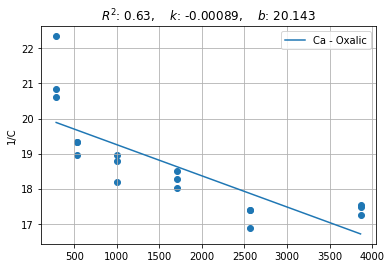

In [ ]:
mask = (element['days']>6)&(element['days']<200)
t = element.loc[mask, 'hours'].values
y = element.loc[mask, '1/C'].values

slope, intercept, r, p, se = linregress(t, y)
func = np.poly1d((slope, intercept))
plt.scatter(t,y)
el = "Ca"
acid='Oxalic'
plt.plot(t , func(t), label = f"{el} - {acid}")
plt.title(f'$R^2$: {r**2:.2f},    $k$: {slope:.5f},    $b$: {intercept:.3f}')
plt.ylabel('1/C')
plt.legend()
plt.grid()
#         plt.savefig(f'../plots/kinetic_{el}_{acid}.png', dpi=300)
plt.show()

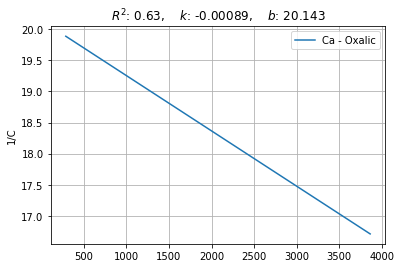

In [ ]:
df = pd.read_csv('../data/dataset.csv', index_col=0)
mask = (df['variable']=='Ca') & (df['parameter']=='Oxalic')

element['hours'] = element['days']*24
element = df.loc[mask]
start_timestep  = element['days'].unique()[0]
element['hours'] = element['days']*24
element.loc[:, '1/C'] = np.nan
element.loc[:, '1/C0'] = np.nan
for day in element['days'].unique():
    initC0 = element.loc[element['days']==start_timestep, 'value']
    timestep = element.loc[element['days']==day, 'value']
    
#     np.log(initC0.values / timestep.values)
    element.loc[element['days']==day, '1/C'] = timestep.values**-1 
    element.loc[element['days']==day, '1/C0'] = initC0.values**-1
# return element
mask = (element['days']>6)&(element['days']<200)
element.loc[:, 'hours'] = element.loc[:, 'days']*24
t = element.loc[mask, 'hours'].values
A = element.loc[mask, '1/C'].values
#         coef = np.polyfit(t , A, 1)
#         func = np.poly1d(coef)
slope, intercept, r, p, se = linregress(t, A)
func = np.poly1d((slope, intercept))
# plt.scatter(t,A)
el = "Ca"
acid='Oxalic'
plt.plot(t , func(t), label = f"{el} - {acid}")
plt.title(f'$R^2$: {r**2:.2f},    $k$: {slope:.5f},    $b$: {intercept:.3f}')
plt.ylabel('1/C')
plt.legend()
plt.grid()
#         plt.savefig(f'../plots/kinetic_{el}_{acid}.png', dpi=300)
plt.show()

In [ ]:
def get_data(k):
    return 1 / (element['1/C0']) + k* element['hours']

<matplotlib.legend.Legend>

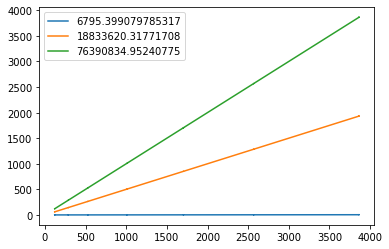

In [ ]:
for k in [0.001, 0.5, 1]:
    rmse = np.sum((element['1/C'] - get_data(k))**2)
    plt.plot(element['hours'],get_data(k), label=rmse)

# plt.plot(element['hours'], element['1/C'], label='True')
plt.legend()

In [ ]:

from scipy.optimize import minimize
# data = np.array([[3.6, 1.8, 0.9, 0.45, 0.225, 0.1125, 3.6, 1.8, 0.9, 0.45, 0.225, 0.1125, 3.6, 1.8, 0.9, 0.45, 0.225, 0.1125, 0],
#                  [0.004407692, 0.004192308, 0.003553846, 0.002576923, 0.001661538, 0.001064286, 0.004835714, 0.004671429, 0.0039, 0.002857143, 0.00175, 0.001057143, 0.004907143, 0.004521429, 0.00375, 0.002764286, 0.001857143, 0.001121429, 0]]).T

v_real = element['1/C']
# s_real = t.values
# data

# def second_order_kinetics(t,k, A0):
#         C_a = A0 / (A0*k*t+1)
#         return C_a


def loss(k):
#     v_max, k_m = theta
    v_pred = get_data(k)
    return np.sum((v_real - v_pred)**2)

res = minimize(loss, [0.1])
res.x

array([-0.00813519])

In [ ]:
get_data(res.x)

108     1.046216
109     1.043285
110     1.046483
123     1.118590
124     1.110586
125     1.119324
138     1.241258
139     1.223322
140     1.242915
153     1.589982
154     1.534946
155     1.595182
168     2.682920
169     2.433980
170     2.708100
183    18.289928
184     8.918570
185    20.221584
198    -2.367396
199    -2.976540
200    -2.324156
dtype: float64

NameError: name 'v_max' is not defined

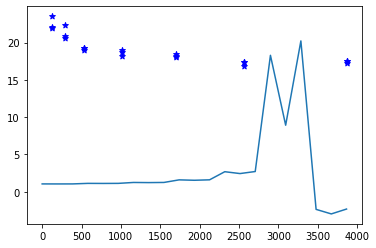

In [ ]:
s_real = element['hours']
plt.scatter(s_real, v_real, marker='*', c='b')
s_plot = np.linspace(0, max(s_real), len(element))
plt.plot(s_plot, §)
plt.title(f'$V_{{max}}$ - {v_max:.2f}, $k_m$ - {k_m:.2f}')
# plt.xlim([0, 4])
# plt.ylim([0, 0.006])
plt.grid()
plt.xlabel('$[t]$')
plt.ylabel('$Si$')
plt.show()

[ 1.14122624e-04 -4.38003091e+09]


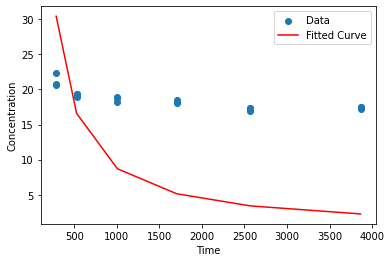

Fitted Rate Constant (k): 0.00011412262404560492
Fitted Initial Concentration (A0): -4380030914.822371


In [ ]:
df = pd.read_csv('../data/dataset.csv', index_col=0)
mask = (df['variable']=='Ca') & (df['parameter']=='Oxalic')

element['hours'] = element['days']*24
element = df.loc[mask]
start_timestep  = element['days'].unique()[0]
element['hours'] = element['days']*24
element.loc[:, '1/C'] = np.nan
element.loc[:, '1/C0'] = np.nan
for day in element['days'].unique():
    initC0 = element.loc[element['days']==start_timestep, 'value']
    timestep = element.loc[element['days']==day, 'value']
    
#     np.log(initC0.values / timestep.values)
    element.loc[element['days']==day, '1/C'] = timestep.values**-1 
    element.loc[element['days']==day, '1/C0'] = initC0.values**-1
# return element
mask = (element['days']>6)&(element['days']<200)
element.loc[:, 'hours'] = element.loc[:, 'days']*24
t = element.loc[mask, 'hours'].values
A = element.loc[mask, '1/C'].values


def second_order_kinetics(t,k, A0):
    print(t,k, A0)
    
    C_a = A0 / (A0*k*t+1)
    return C_a
# Define the second-order kinetics function
def second_order_kinetics(t, k, A0):
    return 1 / (1 / A0 + k * t)

# Generate example data
# t = np.array([0, 1, 2, 3, 4, 5])  # Time points
# A = np.array([1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125])  # Concentrations at each time point

# Fit the data to the second-order kinetics function
initial_guess = (1.0, 21.0)  # Initial guess for k and A0
params, covariance = curve_fit(second_order_kinetics, t, A, p0=initial_guess)

# Extract the fitted parameters
k_fit, A0_fit = params

print(params)
# Calculate the fitted curve
A_fit = second_order_kinetics(t, k_fit, A0_fit)

# Plot the original data and the fitted curve
plt.scatter(t, A, label='Data')
plt.plot(t, A_fit, label='Fitted Curve', color='red')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

# Print the fitted parameters
print(f"Fitted Rate Constant (k): {k_fit}")
print(f"Fitted Initial Concentration (A0): {A0_fit}")


In [ ]:
second_order_kinetics(t,1.0, 1.0)

[ 288  288  288  528  528  528 1008 1008 1008 1704 1704 1704 2568 2568
 2568 3864 3864 3864] 1.0 1.0


array([0.00346021, 0.00346021, 0.00346021, 0.00189036, 0.00189036,
       0.00189036, 0.00099108, 0.00099108, 0.00099108, 0.00058651,
       0.00058651, 0.00058651, 0.00038926, 0.00038926, 0.00038926,
       0.00025873, 0.00025873, 0.00025873])

<matplotlib.collections.PathCollection>

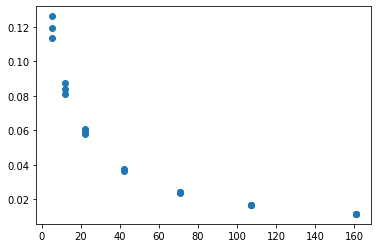

In [ ]:
element

t= element['days'].values
A= element['Ca'].values
plt.scatter(t,A)

In [ ]:
element = df.loc[mask]
start_timestep  = element['days'].unique()[0]
element.loc[:, 'lnC0_Ct'] = np.nan
for day in element['days'].unique():
    initC0 = element.loc[element['days']==start_timestep, 'value']
    timestep = element.loc[element['days']==day, 'value']
    element.loc[element['days']==day, 'lnC0_Ct'] = np.log(initC0.values / timestep.values)
    print(day)

5
12
22
42
71
107
161


/Users/mikhailgasanov/geo/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/mikhailgasanov/geo/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
